In [101]:
#import all necessary libraries
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import datetime as dt
from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.cm as cm
from scipy.stats import iqr

In [102]:
######################################################################### download
#load the csv file and save it into the dataframe donors
mypath=os.path.join("..","Project","donors_preprocessed.csv")
donors=pd.read_csv(os.path.join(mypath),index_col = 0, encoding='utf-8-sig')

In [103]:
donors.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90480 entries, 95515 to 185114
Data columns (total 163 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   RECPGVG                   int64  
 1   RECSWEEP                  int64  
 2   NUMCHLD                   float64
 3   INCOME                    int64  
 4   HIT                       int64  
 5   SOLP3                     int64  
 6   SOLIH                     int64  
 7   COLLECT1                  int64  
 8   VETERANS                  int64  
 9   BIBLE                     int64  
 10  CATLG                     int64  
 11  HOMEE                     int64  
 12  PETS                      int64  
 13  CDPLAY                    int64  
 14  STEREO                    int64  
 15  PCOWNERS                  int64  
 16  PHOTO                     int64  
 17  CRAFTS                    int64  
 18  FISHER                    int64  
 19  GARDENIN                  int64  
 20  BOATS                 

In [104]:
donors.head()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_1,urbanicity_level_2,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.0,4,0,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15078,0,0,0.0,3,2,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
172556,0,0,0.0,1,2,-1,-1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
47784,0,0,0.0,5,0,-1,-1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
62117,0,0,1.0,4,0,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [105]:
donors.shape

(90480, 163)

In [106]:
non_metric_features=['RECPGVG',
 'INCOME',
 'RECSWEEP',
 'SOLP3',
 'SOLIH',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'PEPSTRFL',
 'RFA_2F',
 'RFA_2A',
 'MDMAUD_F',
 'MDMAUD_A',
 'socio_econ_neighbourhood',
 'STATE_FL',
 'STATE_GA',
 'STATE_IL',
 'STATE_MI',
 'STATE_NC',
 'STATE_Other',
 'STATE_TX',
 'STATE_WA',
 'MDMAUD_R_D',
 'MDMAUD_R_I',
 'MDMAUD_R_L',
 'MDMAUD_R_X',
 'DTSRCE_1',
 'DTSRCE_2',
 'DTSRCE_3',
 'GENDER_J',
 'GENDER_M',
 'GENDER_U',
 'urbanicity_level_1',
 'urbanicity_level_2',
 'urbanicity_level_3',
 'urbanicity_level_4',
 'MSA_1600.0',
 'MSA_4480.0',
 'MSA_Other',
 'DMA_803.0',
 'DMA_807.0',
 'DMA_Other']

In [107]:
len(non_metric_features)

57

In [108]:
metric_features=[
 'NUMCHLD',
 'HIT',
 'POP901',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'AGE904',
 'AGE907',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'HU2',
 'HU5',
 'HVP1',
 'HVP2',
 'HVP3',
 'HVP4',
 'HVP5',
 'HVP6',
 'IC3',
 'IC5',
 'IC6',
 'IC7',
 'IC8',
 'IC9',
 'IC10',
 'IC11',
 'IC12',
 'IC13',
 'IC14',
 'PEC1',
 'PEC2',
 'LFC10',
 'OEDC1',
 'OEDC2',
 'OEDC3',
 'OEDC4',
 'OEDC5',
 'OEDC6',
 'OEDC7',
 'EC2',
 'EC3',
 'EC4',
 'EC5',
 'EC6',
 'EC7',
 'EC8',
 'SEC1',
 'SEC2',
 'AFC1',
 'AFC4',
 'ANC1',
 'ANC2',
 'ANC3',
 'ANC4',
 'ANC5',
 'ANC6',
 'ANC7',
 'ANC8',
 'ANC9',
 'ANC10',
 'ANC11',
 'ANC12',
 'ANC13',
 'ANC14',
 'ANC15',
 'POBC1',
 'POBC2',
 'VOC1',
 'VOC2',
 'VOC3',
 'HC15',
 'AC1',
 'AC2',
 'NUMPROM',
 'CARDPM12',
 'NUMPRM12',
 'RAMNTALL',
 'NGIFTALL',
 'MINRAMNT',
 'MAXRAMNT',
 'LASTGIFT',
 'TIMELAG',
 'AVGGIFT',
 'AGE',
 'TENURE',
 'INACTIVITY',
 'PROMUSE']

In [109]:
len(metric_features)

106

In [110]:
donors['MDMAUD_F'].replace({"X":0}, inplace= True)
donors['MDMAUD_F'].astype('int64', copy=False)

CONTROLN
95515     0
15078     0
172556    0
47784     0
62117     0
         ..
184568    0
122706    0
189641    0
4693      0
185114    1
Name: MDMAUD_F, Length: 90480, dtype: int64

In [111]:
donors.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90480 entries, 95515 to 185114
Data columns (total 163 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   RECPGVG                   int64  
 1   RECSWEEP                  int64  
 2   NUMCHLD                   float64
 3   INCOME                    int64  
 4   HIT                       int64  
 5   SOLP3                     int64  
 6   SOLIH                     int64  
 7   COLLECT1                  int64  
 8   VETERANS                  int64  
 9   BIBLE                     int64  
 10  CATLG                     int64  
 11  HOMEE                     int64  
 12  PETS                      int64  
 13  CDPLAY                    int64  
 14  STEREO                    int64  
 15  PCOWNERS                  int64  
 16  PHOTO                     int64  
 17  CRAFTS                    int64  
 18  FISHER                    int64  
 19  GARDENIN                  int64  
 20  BOATS                 

In [112]:
analysis_metricfeatures=['ETH1','ETH2','ETH3','ETH4','HVP1','HVP2','HVP6','HVP3' ,'IC5','IC13', 'IC14','MAXRAMNT','TIMELAG','AVGGIFT','RAMNTALL']

In [113]:
iqr1=iqr(donors[analysis_metricfeatures].values, axis=0)

In [114]:
median1=np.median(donors[analysis_metricfeatures].values, axis=0)

In [115]:
donors_withoutscaler = donors.copy()

In [116]:
# Normalization
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(donors[metric_features])
scaled_feat

array([[0.        , 0.        , 0.00999037, ..., 0.29166667, 0.60869565,
        0.36      ],
       [0.        , 0.06451613, 0.07087492, ..., 0.25      , 0.60869565,
        0.36      ],
       [0.        , 0.06451613, 0.00642383, ..., 0.375     , 0.60869565,
        0.36      ],
       ...,
       [0.        , 0.        , 0.0055322 , ..., 0.08333333, 0.17391304,
        0.76      ],
       [0.        , 0.        , 0.01763007, ..., 0.41666667, 0.04347826,
        0.88      ],
       [0.        , 0.09677419, 0.03980951, ..., 0.33333333, 0.08695652,
        0.84      ]])

In [117]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

Parameters fitted:
 [  0.           0.           6.           0.           0.
   0.          16.           4.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  18.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.        

In [118]:
donors[metric_features] = scaled_feat
donors.head()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_1,urbanicity_level_2,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.000000,4,0.000000,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15078,0,0,0.000000,3,0.064516,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
172556,0,0,0.000000,1,0.064516,-1,-1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
47784,0,0,0.000000,5,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
62117,0,0,0.142857,4,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Robust Scaller

In [119]:
from sklearn.preprocessing import RobustScaler

In [120]:

#robust_metric_features= donors[metric_features].values
# perform a robust scaler transform of the dataset
trans = RobustScaler()
robust_metric_features = trans.fit_transform(donors[metric_features])

trans_cluster=RobustScaler()
#robust_analysis=donors[analysis_metricfeatures].values
robust_analysis = trans_cluster.fit_transform(donors[analysis_metricfeatures])

# convert the array back to a dataframe
#robust_metric_features_df = pd.DataFrame(robust_metric_feautures)
# summarize
#print(robust_metric_features_df.describe())
donors[metric_features]=robust_metric_features
donors.head()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_1,urbanicity_level_2,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.000000,4,0.000000,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15078,0,0,0.000000,3,0.666667,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
172556,0,0,0.000000,1,0.666667,-1,-1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
47784,0,0,0.000000,5,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
62117,0,0,0.142857,4,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [121]:
robust_analysis

array([[-0.06666667,  0.        ,  0.        , ..., -0.33333333,
        -0.55016068,  1.81111111],
       [ 0.2       ,  0.16666667,  0.        , ...,  0.55555556,
        -0.58746261,  1.38888889],
       [-2.13333333, -0.16666667,  0.        , ...,  0.22222222,
        -0.68327339,  0.35555556],
       ...,
       [-0.73333333,  2.16666667,  0.        , ..., -0.44444444,
        -0.4722813 , -0.21111111],
       [-0.06666667,  0.        ,  1.        , ..., -0.33333333,
         0.08063339,  4.67777778],
       [-0.46666667,  1.83333333,  0.        , ..., -0.11111111,
        12.2039008 , 41.08888889]])

# PCA with robust

In [100]:
df_pca1 = robust.copy()

NameError: name 'robust' is not defined

In [ ]:
# Use PCA to reduce dimensionality of data
from sklearn.decomposition import PCA
pca = PCA()
pca_feat1 = pca.fit_transform(df_pca1[metric_features])
pca_feat1  

In [ ]:
# Covariance matrix of the data 
cov_matrix1 = df_pca1[metric_features].cov()
cov_matrix1

In [ ]:
# Composing back the covariance matrix
pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
             index=cov_matrix1.index, 
             columns=cov_matrix1.columns)

In [ ]:
# Obtaining the projected observations on the principal components axes (linear combinations)
pd.DataFrame(df_pca1[metric_features].values @ pca.components_.T, 
             index=df_pca1.index,
             columns=[f"PC{i}" for i in range(pca.n_components_)])

In [ ]:
# Output PCA table
output=pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)
output

In [ ]:
output.loc[output['Cumulative'] >= 0.79] #we get to 0.79 with 7 components

In [ ]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=8)
ax2.set_title("Variance Explained", fontsize=8)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [ ]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=7)
pca_feat1 = pca.fit_transform(df_pca1[metric_features])
pca_feat_names1 = [f"PC{i}" for i in range(pca.n_components_)]
pca_df1 = pd.DataFrame(pca_feat1, index=df_pca1.index, columns=pca_feat_names1)  # remember index=df_pca.index
pca_df1

In [ ]:
# Reassigning df to contain pca variables

df_pca1 = pd.concat([df_pca1, pca_df1], axis=1)
df_pca1.head()

In [ ]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca1[metric_features + pca_feat_names1].corr().loc[metric_features, pca_feat_names1]
loadings.style.applymap(_color_red_or_green)

In [ ]:
donors = pd.concat([donors, pca_df1], axis=1)

In [ ]:
pd.DataFrame(data=pca.inverse_transform(pca_df1[pca_feat_names1]))

In [ ]:
donors[metric_features].head()

# Perspectives

In [122]:
#didn't put MSA e DMA and EC1
neighborhood_metricfeatures=['HVP1','HVP2','HVP3','HVP4','HVP5','HVP6','HC15','ANC1','ANC2','ANC3','ANC4', 'ANC5','ANC6','ANC7','ANC8', 'ANC9','ANC10','ANC11','ANC12','ANC13','ANC14','ANC15','POBC1','POBC2','ETH1','ETH2','ETH3','ETH4','ETH5','ETH6','ETH7','ETH8','ETH9','ETH10','ETH11','ETH12','OEDC1','OEDC2','OEDC3','OEDC4','OEDC5','OEDC6','OEDC7','EC2','EC3','EC4','EC5','EC6','EC7','EC8','SEC1','SEC2','IC3','IC5','IC6','IC7','IC8','IC9','IC10','IC11','IC12','IC13','IC14','LFC10','VOC1','VOC2','VOC3','HU2','HU5','AGE904','AGE907','AGEC1','AGEC2','AGEC3','AGEC4','AGEC5','AGEC6','AGEC7','AC1','AC2','AFC1','AFC4']

In [123]:
#instead of MAXDATE, LASTDATE we will use PROMUSE and we will take out SOLP3, SOLIH and MDMAUD and RFA_2R,RFA_2A becacuse they are categorical encoded variables. We will also remove 'COLLECT1','VETERANS','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES' because they are binary variables. And we should remove DATASRCE because is a categorical variable.

communication_metricfeatures=['HIT','NUMPRM12','NUMPROM','NGIFTALL','RAMNTALL','PROMUSE','AVGGIFT']

In [124]:
socio_demo_metricfeatures=['AGE']#numchild to remove
behav_metricfeatures = ['RAMNTALL','NGIFTALL','MINRAMNT','MAXRAMNT','LASTGIFT','TIMELAG','AVGGIFT','INACTIVITY'] 

In [125]:
cluster_neighborhood = donors[neighborhood_metricfeatures].copy()
cluster_communication = donors[communication_metricfeatures].copy()
cluster_socio_demographic=donors['AGE'].copy()
cluster_behaviour=donors[behav_metricfeatures].copy()


In [190]:
#didn't put MSA e DMA and EC1
neighborhood_up_metricfeatures=['ETH1','ETH2','ETH3','ETH4','HVP1','HVP2','HVP6','HVP3' ,'IC5','IC13', 'IC14']
neighborhood_up_up_metricfeatures=['ETH1','ETH2','ETH3','HVP2','HVP6','IC13','PEC1']

In [191]:
cluster_neighborhood_up = donors[neighborhood_up_metricfeatures]
cluster_neighborhood_up_up = donors[neighborhood_up_metricfeatures]

In [192]:
behav_up_metricfeatures = ['MAXRAMNT','TIMELAG','AVGGIFT','RAMNTALL'] 

In [193]:
cluster_up_behaviour=donors[behav_up_metricfeatures]

In [130]:
#we can try to put communication features in behav cluster

In [131]:
#distribution of age 

In [132]:
donors['AGE']

CONTROLN
95515    -0.285714
15078     0.321429
172556    0.035714
47784     0.321429
62117    -1.107143
            ...   
184568    0.321429
122706   -0.750000
189641   -0.321429
4693     -0.392857
185114    0.392857
Name: AGE, Length: 90480, dtype: float64

<ipython-input-133-5ac3ca9aaa78>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-133-5ac3ca9aaa78>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


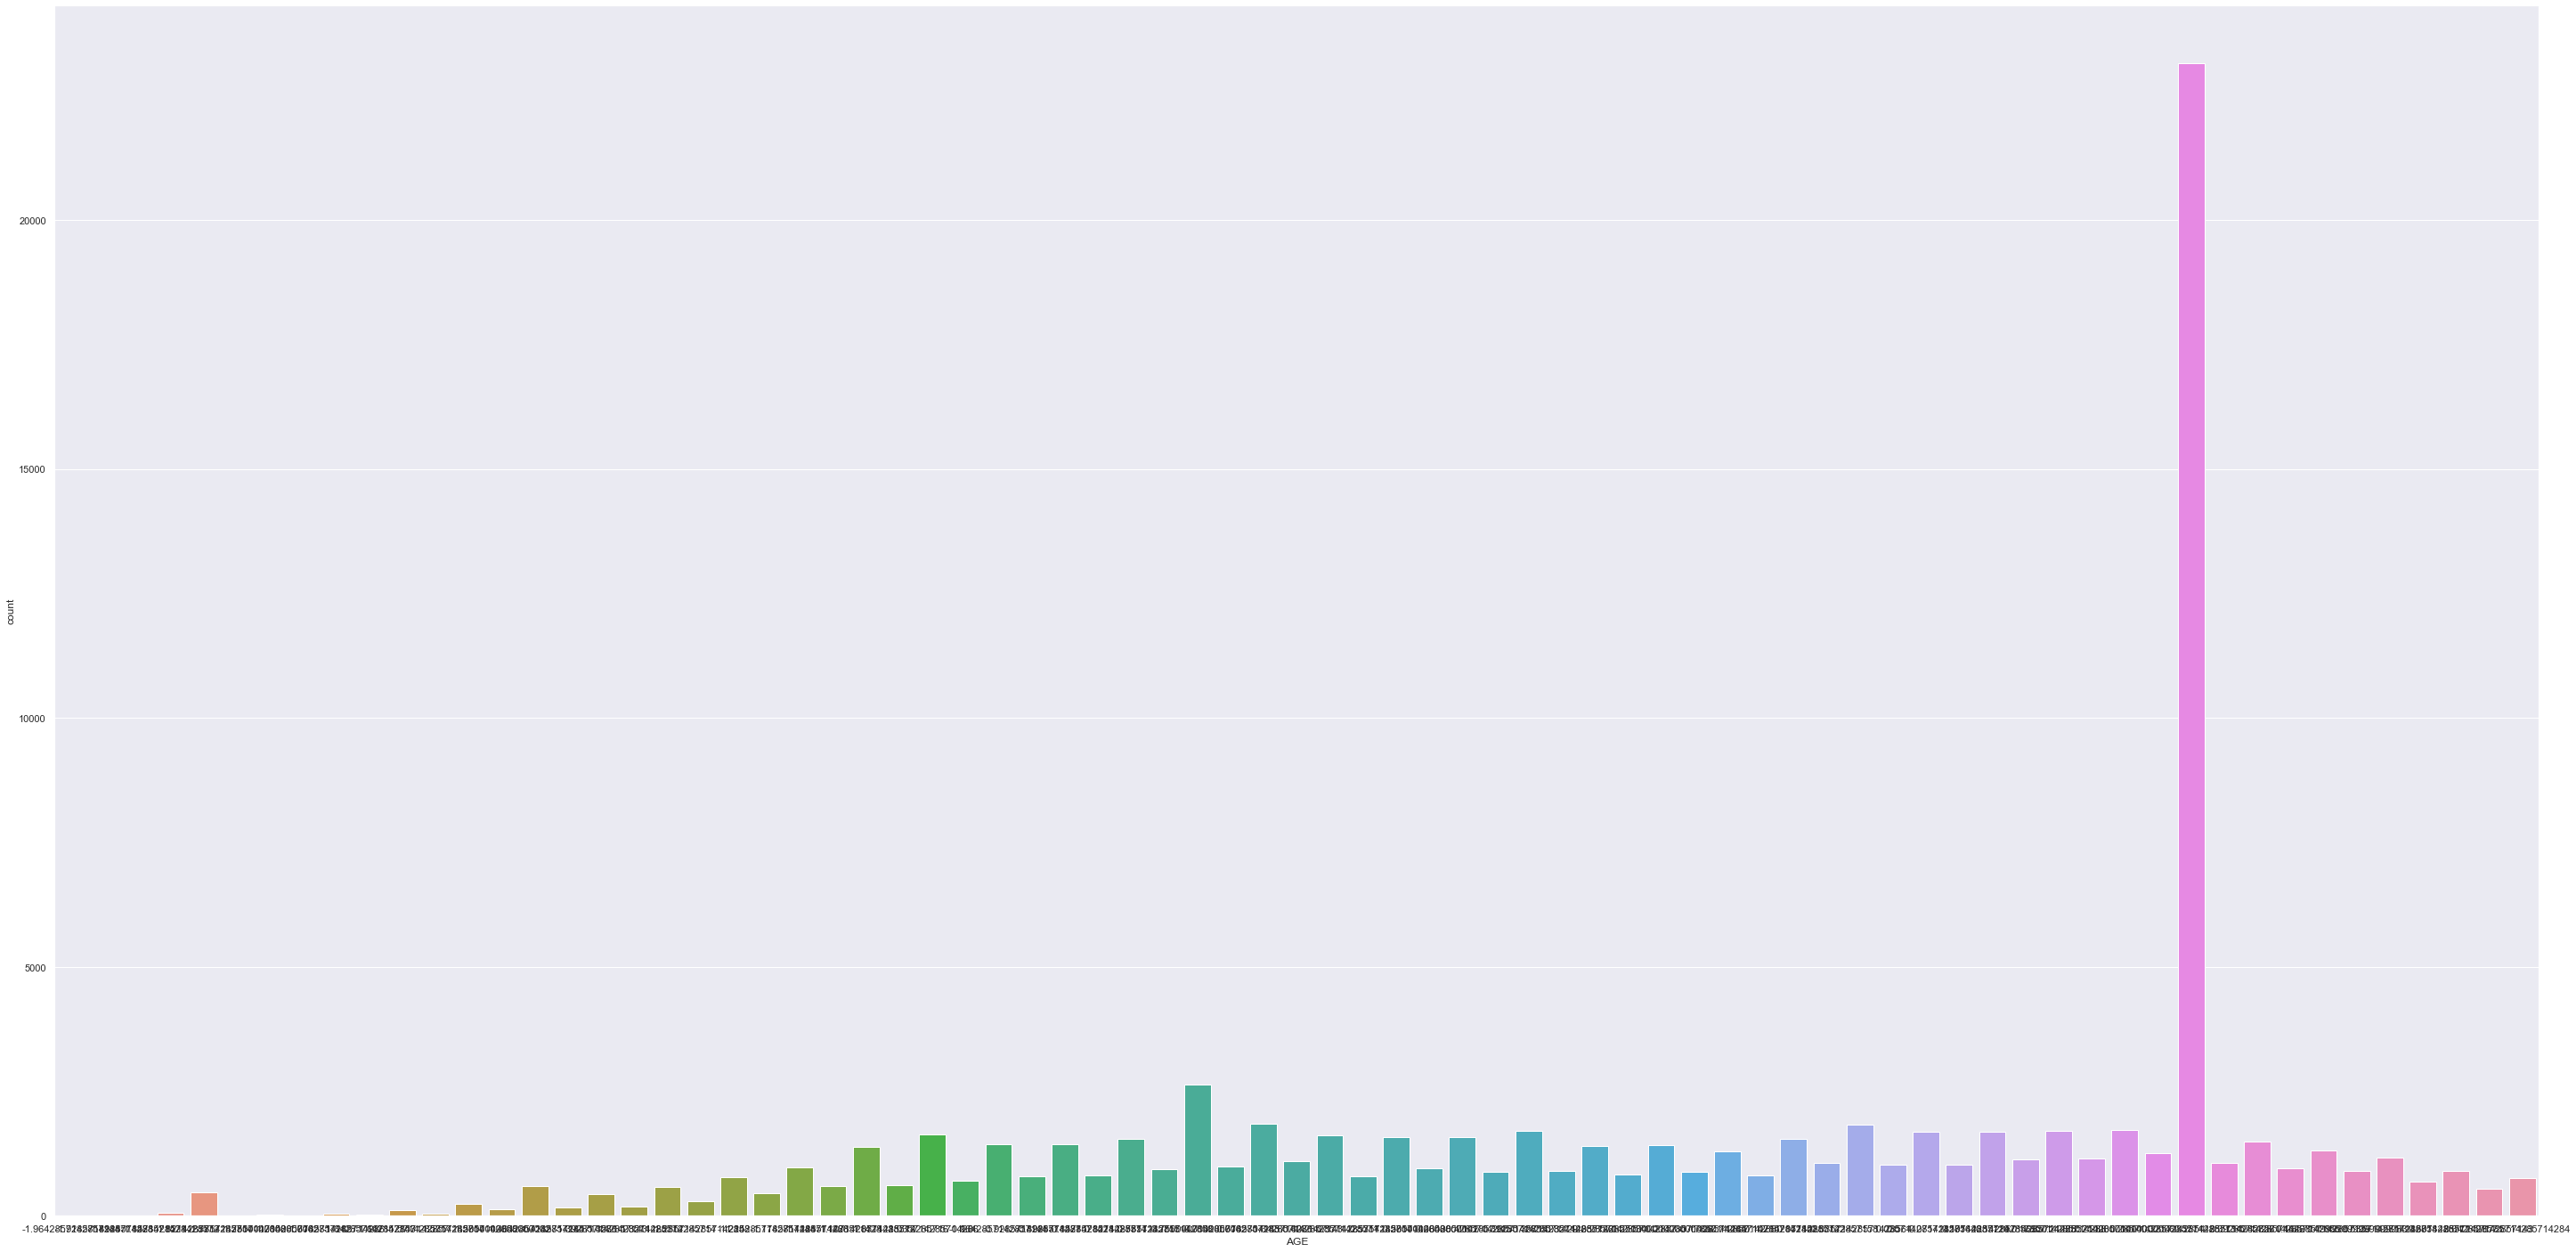

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50,25))
sns.countplot(x=donors["AGE"])
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)


# Kmeans neigh updates

<ipython-input-134-67638363ea90>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-134-67638363ea90>:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


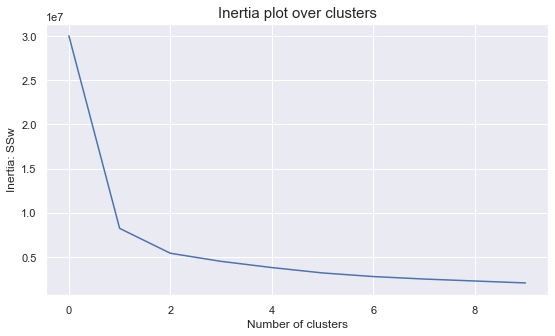

In [134]:
# To decide how many clusters to use in the clustering we will use the elbow method
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(cluster_neighborhood_up_up)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution


plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [135]:
# final cluster solution
number_clusters = 3
kmclust_neighborhood_up = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels_neighborhood_up = kmclust_neighborhood_up.fit_predict(cluster_neighborhood_up_up)
pd.DataFrame(kmclust_neighborhood_up.transform(cluster_neighborhood_up_up))
km_labels_neighborhood_up

array([0, 0, 0, ..., 0, 0, 0])

In [136]:
# Characterizing the final clusters
df_concat_neighborhood_up = pd.concat((donors, pd.Series(km_labels_neighborhood_up, name='labels')), axis=1)
df_concat_neighborhood_up.groupby('labels').mean()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_1,urbanicity_level_2,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other
labels,,,,,,,,,,,,,,,,,,,,,
0.0,0.000232,0.023843,0.033663,3.803420,0.966746,-0.553627,0.558793,0.077934,0.115158,0.104800,...,0.206603,0.230574,0.203735,0.232383,0.038179,0.008524,0.692292,0.014311,0.007336,0.930332
1.0,0.000000,0.022674,0.034967,3.767442,0.914147,-0.529651,0.499419,0.066860,0.116279,0.101163,...,0.219186,0.234302,0.198837,0.220349,0.033140,0.007558,0.683140,0.011628,0.006395,0.943023
2.0,0.001147,0.024474,0.036766,3.741109,1.066667,-0.655832,0.438623,0.077629,0.113576,0.106310,...,0.209943,0.230593,0.204207,0.235182,0.038241,0.008413,0.692925,0.014532,0.006119,0.933078


In [137]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_concat_neighborhood_up[neighborhood_up_up_metricfeatures])  # get total sum of squares
ssw_labels = df_concat_neighborhood_up[neighborhood_up_up_metricfeatures + ["labels"]].groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2_neighborhood_up = ssb / sst
r2_neighborhood_up

0.8020429069708729

# Kmeans behav updated

<ipython-input-138-a034a82cd13a>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-138-a034a82cd13a>:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


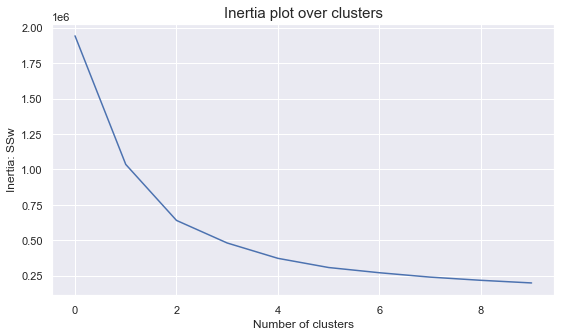

In [138]:
# To decide how many clusters to use in the clustering we will use the elbow method
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(cluster_up_behaviour)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution


plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [139]:
# final cluster solution
number_clusters = 4
kmclust_behavup = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels_behavup = kmclust_behavup.fit_predict(cluster_up_behaviour)
pd.DataFrame(kmclust_behavup.transform(cluster_up_behaviour))
km_labels_behavup

array([1, 1, 1, ..., 1, 1, 3])

In [140]:
donors['behavior_up_labels']= km_labels_behavup 
donors['neighborhood_up_labels']=km_labels_neighborhood_up

In [141]:
donors=donors[donors['behavior_up_labels']!=2]

In [142]:
cluster_up_behaviour=donors[behav_up_metricfeatures]

<ipython-input-143-a034a82cd13a>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-143-a034a82cd13a>:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


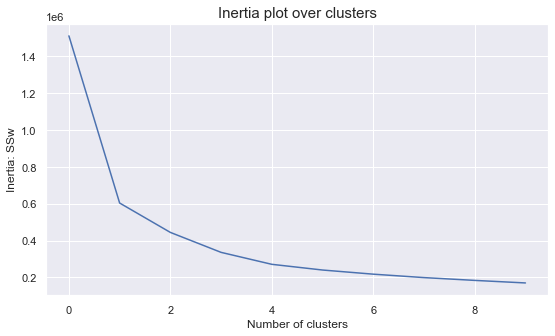

In [143]:
# To decide how many clusters to use in the clustering we will use the elbow method
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(cluster_up_behaviour)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution


plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [144]:
# final cluster solution
number_clusters = 3
kmclust_behavup = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels_behavup = kmclust_behavup.fit_predict(cluster_up_behaviour)
pd.DataFrame(kmclust_behavup.transform(cluster_up_behaviour))
km_labels_behavup

array([0, 0, 0, ..., 0, 0, 1])

In [145]:
# Characterizing the final clusters
df_concat_behavup = pd.concat((donors, pd.Series(km_labels_behavup, name='labels')), axis=1)
df_concat_behavup.groupby('labels').mean()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other,behavior_up_labels,neighborhood_up_labels
labels,,,,,,,,,,,,,,,,,,,,,
0.0,0.000288,0.023537,0.033969,3.796446,0.965803,-0.554964,0.544454,0.077244,0.114725,0.104215,...,0.203947,0.232412,0.037927,0.008335,0.692860,0.014206,0.007182,0.931118,0.932900,0.075514
1.0,0.000000,0.027848,0.033273,3.693671,1.009283,-0.670886,0.460759,0.086076,0.098734,0.116456,...,0.200000,0.225316,0.032911,0.007595,0.648101,0.015190,0.005063,0.936709,0.956962,0.081013
2.0,0.000222,0.026006,0.033404,3.821960,1.009187,-0.582129,0.593910,0.078684,0.119804,0.108246,...,0.200711,0.229607,0.038898,0.009780,0.688153,0.014225,0.007780,0.929540,0.933096,0.078017


In [146]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_concat_behavup[behav_up_metricfeatures])  # get total sum of squares
ssw_labels = df_concat_behavup[behav_up_metricfeatures + ["labels"]].groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2_behav_up = ssb / sst
r2_behav_up

0.5508946878495872

# Performance of Kmeans

In [147]:
data={'kmeans_cluster_neighborhood_up':[r2_neighborhood_up],'kmeans_cluster_behaviour_up':[r2_behav_up]}
r2_scores=pd.DataFrame(data).from_dict(data, orient='index')
r2_scores

,0
kmeans_cluster_neighborhood_up,0.802043
kmeans_cluster_behaviour_up,0.550895


In [148]:
len(km_labels_neighborhood_up)

90480

In [149]:
donors['behavior_up_labels'] = km_labels_behavup 


In [150]:
# Count label frequencies (contigency table)
donors.groupby(['neighborhood_up_labels', 'behavior_up_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('behavior_up_labels', 'neighborhood_up_labels', 0)

neighborhood_up_labels,0,1,2
behavior_up_labels,,,
0,72301,3179,4755
1,699,61,64
2,8324,432,663


In [151]:
# Percentage
donors.groupby(['neighborhood_up_labels', 'behavior_up_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('behavior_up_labels', 'neighborhood_up_labels', 0).div(len(donors.index)).mul(100)

neighborhood_up_labels,0,1,2
behavior_up_labels,,,
0,79.910033,3.513561,5.255421
1,0.772563,0.067420,0.070735
2,9.200027,0.477464,0.732775


In [152]:
# Clusters with low frequency to be merged:
to_merge = [(1,1), (2,1)]

df_centroids = donors.groupby(['neighborhood_up_labels', 'behavior_up_labels'])\
    [metric_features].mean()

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(1, 1): (1, 0), (2, 1): (2, 0)}

In [153]:
df_ = donors.copy()

# Changing the behavior_labels and product_labels based on source_target
for source, target in source_target.items():
    mask = (df_['neighborhood_up_labels']==source[0]) & (df_['behavior_up_labels']==source[1])
    df_.loc[mask, 'neighborhood_up_labels'] = target[0]
    df_.loc[mask, 'behavior_up_labels'] = target[1]

# New contigency table
df_.groupby(['neighborhood_up_labels', 'behavior_up_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('behavior_up_labels', 'neighborhood_up_labels', 0)

neighborhood_up_labels,0,1,2
behavior_up_labels,,,
0,72301.0,3240.0,4819.0
1,699.0,NaN,NaN
2,8324.0,432.0,663.0


In [175]:
# Merged cluster centroids

table_clusters=donors.groupby(['neighborhood_up_labels', 'behavior_up_labels'])\
    [analysis_metricfeatures].mean()

In [178]:
tabel_clusters=(table_clusters*iqr1)+median1

In [179]:
table_clusters

ETH1      ETH2      ETH3  \
neighborhood_up_labels behavior_up_labels                                 
0                      0                  -0.454067  1.156157  0.832727   
                       1                  -0.371197  0.903910  1.123033   
                       2                  -0.625645  1.422794  0.906655   
1                      0                  -0.602705  0.274720  0.197546   
                       1                  -0.580328  0.456284  0.180328   
                       2                  -0.603395  0.373843  0.164352   
2                      0                  -0.725258  0.395584  0.426709   
                       1                  -0.570833  0.505208  0.296875   
                       2                  -0.719457  0.365008  0.425339   

                                               ETH4       HVP1      HVP2  \
neighborhood_up_labels behavior_up_labels                                  
0                      0                   0.470526   0.503592  0.384131   
                       1                   0.615880   0.845494  0.605780   
                       2                   0.660860   0.570078  0.447905   
1                      0                   4.833595  10.249694  3.745329   
                       1                   3.926230  10.269581  3.737705   
                       2                   4.662037  10.203189  3.742870   
2                      0                   4.441640   7.474612  3.229258   
                       1                   2.812500   7.256944  3.143750   
                       2                   4.491704   7.536115  3.221357   

                                                HVP6      HVP3       IC5  \
neighborhood_up_labels behavior_up_labels                                  
0                      0                    0.982711  0.166064  0.057102   
                       1                    1.736767  0.301301  0.254502   
                       2                    1.100553  0.207027  0.081455   
1                      0                   76.773199  1.268535  2.407937   
                       1                   76.295082  1.269980  2.202708   
                       2                   76.240741  1.270001  2.509463   
2                      0                   30.141115  1.195873  1.488128   
                       1                   29.984375  1.179688  1.527342   
                       2                   31.686275  1.188443  1.478612   

                                               IC13      IC14   MAXRAMNT  \
neighborhood_up_labels behavior_up_labels                                  
0                      0                   0.617474  0.522697   0.143507   
                       1                   0.762518  0.720315  11.904041   
                       2                   0.671072  0.563731   0.377105   
1                      0                   4.271469  4.722240   0.421781   
                       1                   4.590164  3.721311   9.785064   
                       2                   4.233796  4.885417   0.498171   
2                      0                   2.596215  2.762671   0.336620   
                       1                   2.765625  3.234375  12.736354   
                       2                   2.526395  2.661388   0.431205   

                                             TIMELAG   AVGGIFT  RAMNTALL  
neighborhood_up_labels behavior_up_labels                                 
0                      0                    0.112007  0.014027  0.336064  
                       1                    0.766015  6.737071  5.204088  
                       2                   10.327046  1.257275 -0.627533  
1                      0                    0.156758  0.317358  0.380911  
                       1                    1.134791  6.478374  3.221645  
                       2                   10.333333  1.412095 -0.615949  
2                      0                    0.153079  0.216759  0.395140  
                       1           

In [173]:
tabel_clusters=(table_clusters*iqr1)+median1

In [174]:
tabel_clusters

,ETH1,ETH2,ETH3,ETH4,HVP1,HVP2,HVP6,HVP3,IC5,IC13,IC14,MAXRAMNT,TIMELAG,AVGGIFT,RAMNTALL
behavior_up_labels,,,,,,,,,,,,,,,
0,85.859587,7.456958,0.783498,2.757475,12.725830,20.147928,5.713641,34.329582,15421.728385,0.879516,1.643672,18.493794,8.045928,11.849080,107.720784
1,86.967233,6.038835,0.989078,3.063107,19.370146,28.868932,9.450243,45.239078,17310.145631,1.201456,2.275485,123.306383,14.161408,58.942513,538.351165
2,83.531585,8.801359,0.838730,3.228050,14.520119,22.856248,6.699756,37.791167,15825.317550,0.965071,1.819195,20.478191,99.949995,20.446960,20.598586


In [172]:
table_clusters.groupby(['behavior_up_labels'])\
    [analysis_metricfeatures].mean()

,ETH1,ETH2,ETH3,ETH4,HVP1,HVP2,HVP6,HVP3,IC5,IC13,IC14,MAXRAMNT,TIMELAG,AVGGIFT,RAMNTALL
behavior_up_labels,,,,,,,,,,,,,,,
0,-0.476028,1.076160,0.783498,0.878737,1.302870,0.685917,5.713641,0.270775,0.235052,0.879516,0.821836,0.165977,0.116214,0.038060,0.341342
1,-0.402184,0.839806,0.989078,1.031553,2.041127,1.034757,9.450243,0.441236,0.497587,1.201456,1.137743,11.811820,0.795712,6.782729,5.126124
2,-0.631228,1.300226,0.838730,1.114025,1.502235,0.794250,6.699756,0.324862,0.291161,0.965071,0.909598,0.386466,10.327777,1.269439,-0.626682


In [ ]:
#didn't put MSA e DMA and EC1
neighborhood_metricfeatures=['HVP1','HVP2','HVP3','HVP4','HVP5','HVP6','HC15','ANC1','ANC2','ANC3','ANC4', 'ANC5','ANC6','ANC7','ANC8', 'ANC9','ANC10','ANC11','ANC12','ANC13','ANC14','ANC15','POBC1','POBC2','ETH1','ETH2','ETH3','ETH4','ETH5','ETH6','ETH7','ETH8','ETH9','ETH10','ETH11','ETH12','OEDC1','OEDC2','OEDC3','OEDC4','OEDC5','OEDC6','OEDC7','EC2','EC3','EC4','EC5','EC6','EC7','EC8','SEC1','SEC2','IC3','IC5','IC6','IC7','IC8','IC9','IC10','IC11','IC12','IC13','IC14','LFC10','VOC1','VOC2','VOC3','HU2','HU5','AGE904','AGE907','AGEC1','AGEC2','AGEC3','AGEC4','AGEC5','AGEC6','AGEC7','AC1','AC2','AFC1','AFC4']
neighborhood_nonmetricfeatures=['MSA_1600.0','MSA_4480.0','MSA_Other','DMA_803.0','DMA_807.0','DMA_Other']

In [ ]:
#instead of MAXDATE, LASTDATE we will use PROMUSE and we will take out SOLP3, SOLIH and MDMAUD and RFA_2R,RFA_2A becacuse they are categorical encoded variables. We will also remove 'COLLECT1','VETERANS','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES' because they are binary variables. And we should remove DATASRCE because is a categorical variable.

communication_metricfeatures=['HIT','NUMPRM12','NUMPROM','NGIFTALL','RAMNTALL','PROMUSE','AVGGIFT']
ccommunication_nonmetricfeatures=['COLLECT1','VETERANS','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES', 'SOLP3',
 'SOLIH','DTSRCE_1','DTSRCE_2','DTSRCE_3'] #should we include RFA , MDMAUD?

In [ ]:
socio_demo_metricfeatures=['NUMCHLD','AGE']
socio_demo_nonmetricfeatures=['INCOME', 'GENDER_J','GENDER_M','GENDER_U','socio_econ_neighbourhood','STATE_FL','STATE_GA','STATE_IL','STATE_MI','STATE_NC','STATE_Other','STATE_TX','STATE_WA', 'urbanicity_level_1','urbanicity_level_2','urbanicity_level_3','urbanicity_level_4']
#won't put RFA, MDMAUD as it belongs to other cluster

behav_metricfeatures = ['RAMNTALL','NGIFTALL','MINRAMNT','MAXRAMNT','LASTGIFT','TIMELAG','AVGGIFT','INACTIVITY'] 
behav_nonmetricfeatures=['RFA_2F','RFA_2A','MDMAUD_F','MDMAUD_A','MDMAUD_R_D','MDMAUD_R_I','MDMAUD_R_L','MDMAUD_R_X']

In [ ]:
#didn't put MSA e DMA and EC1
neighborhood_up_metricfeatures=['ETH1','ETH2','ETH3','ETH4','HVP1','HVP2','HVP6','HVP3' ,'IC5','IC13', 'IC14']

cluster_neighborhood_up = donors[neighborhood_up_metricfeatures].copy()

behav_up_metricfeatures = ['MAXRAMNT','TIMELAG','AVGGIFT','RAMNTALL'] 

cluster_up_behaviour=donors[behav_up_metricfeatures].copy()

analysis_metricfeatures=['ETH1','ETH2','ETH3','ETH4','HVP1','HVP2','HVP6','HVP3' ,'IC5','IC13', 'IC14','MAXRAMNT','TIMELAG','AVGGIFT','RAMNTALL']

## Cluster Analysis

In [ ]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
       # ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
plt.subplots_adjust(hspace=0.4, top=0.90)
plt.suptitle("Cluster Simple Profilling", fontsize=23)
cluster_profiles(
    df = donors[metric_features + non_metric_features + ['neighborhood_up_labels', 'behavior_up_labels']], 
    label_columns = ['neighborhood_up_labels', 'behavior_up_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Neighborhood clustering", "Behavior clustering"]
)

plt.show()
print(fig.show())
from IPython.display import display
display(fig)
    

## Cluster visualization using t-SNE behavior

In [ ]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(cluster_up_behaviour)

In [ ]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=donors['behavior_up_labels'], colormap='tab10', figsize=(15,10))
plt.show()

## Cluster visualization using t-SNE neighborhood

In [ ]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(cluster_neighborhood_up_up)

In [ ]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=donors['neighborhood_up_labels'], colormap='tab10', figsize=(15,10))
plt.show()

# Mean shift neighborhood

In [ ]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

# The following bandwidth can be automatically detected using (we need to set quantile though)
# Based on distance to nearest neighbors for all observations
bandwidth = estimate_bandwidth(cluster_neighborhood_up_up, quantile=0.06, random_state=1, n_jobs=-1)
bandwidth

# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4, min_bin_freq=10)
ms_labels = ms.fit_predict(cluster_neighborhood_up_up)

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)



In [ ]:
# Concatenating the labels to df
df_concat = pd.concat([cluster_neighborhood_up_up, pd.Series(ms_labels, index=cluster_neighborhood_up_up.index, name="ms_labels")], axis=1)
df_concat.head()



In [ ]:
# Computing the R^2 of the cluster solution
# using R^2

def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(cluster_neighborhood_up_up)  # get total sum of squares
ssw_labels = df_concat.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)



In [ ]:
cluster_variables = cluster_neighborhood_up_up.columns

In [182]:
mean_shift_nottrans=df_concat.groupby(by='ms_labels').mean()
mean_shift_nottrans

,ETH1,ETH2,ETH3,ETH4,HVP1,HVP2,HVP6,HVP3,IC5,IC13,IC14
ms_labels,,,,,,,,,,,
0,-0.430553,1.191226,0.675693,0.290380,0.358542,0.312907,0.667517,0.138737,0.033741,0.579619,0.484033
1,-0.198338,0.244807,0.385906,1.506472,7.640833,3.279348,31.780920,1.207110,1.826875,2.964525,3.464525
2,-0.387111,0.368714,0.326763,2.498484,9.197540,3.589447,51.339651,1.250379,1.926410,3.238817,3.336619
3,-0.468414,0.375566,0.272816,3.243689,10.046602,3.726641,68.455340,1.268689,2.127994,4.007767,3.907282
4,-0.530113,0.366076,0.241546,3.880032,10.340132,3.752979,79.196457,1.267084,2.038188,3.254428,3.586957
5,-0.467520,0.138400,0.134400,4.480800,10.603022,3.794240,87.724800,1.274500,2.402537,4.302400,3.774400
6,-0.250839,0.058034,0.077698,3.482734,10.774261,3.822331,94.135252,1.278889,3.924880,6.738129,9.494245
7,-1.994373,0.684996,0.445013,11.354220,8.635124,3.477136,35.797954,1.236373,0.735277,1.810742,0.851662
8,-2.449283,0.937131,0.574684,12.254430,6.748101,3.225620,9.874684,1.203303,0.300925,1.089873,0.522785


In [183]:
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(mean_shift_nottrans)

<ipython-input-187-8cd9b4a2e658>:42: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-187-8cd9b4a2e658>:44: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


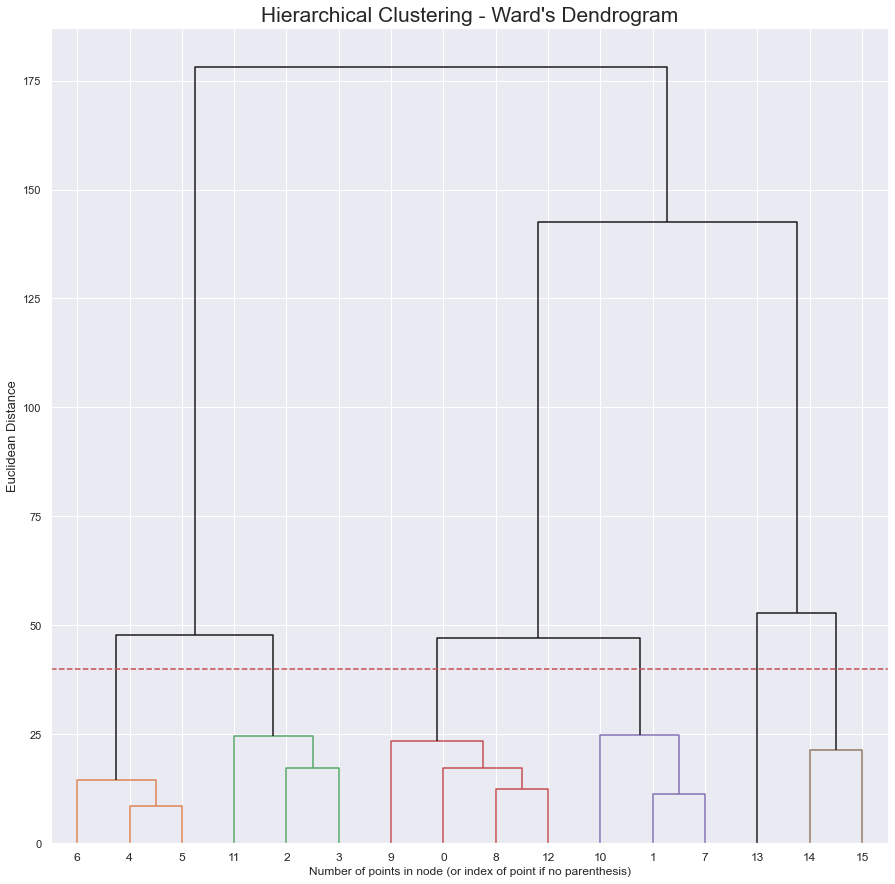

In [187]:

linkage = 'ward'
distance = 'euclidean'

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(15,15))
# The Dendrogram parameters need to be tuned
y_threshold = 40
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [188]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=6
)
hclust_labels = hclust.fit_predict(mean_shift_nottrans)
mean_shift_nottrans['hclust_labels'] = hclust_labels

mean_shift_nottrans  # centroid's cluster labels

,ETH1,ETH2,ETH3,ETH4,HVP1,HVP2,HVP6,HVP3,IC5,IC13,IC14,hclust_labels
ms_labels,,,,,,,,,,,,
0,-0.430553,1.191226,0.675693,0.290380,0.358542,0.312907,0.667517,0.138737,0.033741,0.579619,0.484033,5
1,-0.198338,0.244807,0.385906,1.506472,7.640833,3.279348,31.780920,1.207110,1.826875,2.964525,3.464525,0
2,-0.387111,0.368714,0.326763,2.498484,9.197540,3.589447,51.339651,1.250379,1.926410,3.238817,3.336619,2
3,-0.468414,0.375566,0.272816,3.243689,10.046602,3.726641,68.455340,1.268689,2.127994,4.007767,3.907282,2
4,-0.530113,0.366076,0.241546,3.880032,10.340132,3.752979,79.196457,1.267084,2.038188,3.254428,3.586957,4
5,-0.467520,0.138400,0.134400,4.480800,10.603022,3.794240,87.724800,1.274500,2.402537,4.302400,3.774400,4
6,-0.250839,0.058034,0.077698,3.482734,10.774261,3.822331,94.135252,1.278889,3.924880,6.738129,9.494245,4
7,-1.994373,0.684996,0.445013,11.354220,8.635124,3.477136,35.797954,1.236373,0.735277,1.810742,0.851662,0
8,-2.449283,0.937131,0.574684,12.254430,6.748101,3.225620,9.874684,1.203303,0.300925,1.089873,0.522785,5


In [189]:
# Centroids of the concatenated cluster labels
hclust_neigh = mean_shift_nottrans.groupby(['hclust_labels'])\
    [neighborhood_up_up_metricfeatures].mean()
hclust_neigh

KeyError: "Columns not found: 'PEC1'"

In [164]:
iqr2=iqr(donors_withoutscaler[cluster_variables].values, axis=0)
median2=np.median(donors_withoutscaler[cluster_variables].values, axis=0)

In [165]:
mean_shift_neigh=df_concat.groupby(by='ms_labels').mean()



In [166]:
#mean_shift_neigh=(mean_shift_neigh*iqr2)+median2

In [167]:
mean_shift_neigh

,ETH1,ETH2,ETH3,ETH4,HVP1,HVP2,HVP6,HVP3,IC5,IC13,IC14
ms_labels,,,,,,,,,,,
0,86.541700,8.147359,0.675693,1.580760,4.226875,10.822680,0.667517,25.879181,13973.698016,0.579619,0.968065
1,90.024928,2.468840,0.385906,4.012943,69.767498,84.983701,31.780920,94.255034,26871.709492,2.964525,6.929051
2,87.193328,3.212282,0.326763,5.996967,83.777862,92.736164,51.339651,97.024261,27587.668688,3.238817,6.673237
3,85.973786,3.253398,0.272816,7.487379,91.419417,96.166019,68.455340,98.196117,29037.657282,4.007767,7.814563
4,85.048309,3.196457,0.241546,8.760064,94.061192,96.824477,79.196457,98.093398,28391.687601,3.254428,7.173913
5,85.987200,1.830400,0.134400,9.961600,96.427200,97.856000,87.724800,98.568000,31012.448000,4.302400,7.548800
6,89.237410,1.348201,0.077698,7.965468,97.968345,98.558273,94.135252,98.848921,41962.660432,6.738129,18.988489
7,63.084399,5.109974,0.445013,23.708440,78.716113,89.928389,35.797954,96.127877,19019.849105,1.810742,1.703325
8,56.260759,6.622785,0.574684,25.508861,61.732911,83.640506,9.874684,94.011392,15895.553165,1.089873,1.045570


In [ ]:
mean_shift_neigh=(mean_shift_neigh*iqr2)+median2

### Merging using Hierarchical clustering

In [168]:
# Centroids of the concatenated cluster labels
df_centroids = donors.groupby(['neighborhood_up_labels', 'behavior_up_labels'])\
    [metric_features].mean()
df_centroids

NUMCHLD       HIT    POP901  \
neighborhood_up_labels behavior_up_labels                                 
0                      0                   0.036418  0.686729  0.814163   
                       1                   0.033157  0.958608  0.766485   
                       2                   0.000000  0.000000 -0.213826   
                       3                   0.024116  0.966142  0.955332   
1                      0                   0.021164  0.662037  1.185811   
                       1                   0.024626  0.945266  0.811277   
                       3                   0.014052  1.224044  1.016696   
2                      0                   0.025210  0.772247  0.926685   
                       1                   0.028001  0.934104  1.158253   
                       3                   0.017857  0.708333  3.088110   

                                            POP90C1   POP90C2   POP90C3  \
neighborhood_up_labels behavior_up_labels                                 
0                      0                  -0.409499  0.140343  0.471901   
                       1                  -0.446434  0.152959  0.514056   
                       2                   0.000000  0.000000  0.000000   
                       3                  -0.417696  0.137527  0.490801   
1                      0                  -0.037575  0.006921  0.054500   
                       1                  -0.051598  0.008608  0.076014   
                       3                  -0.053486  0.000000  0.095197   
2                      0                  -0.139190  0.042065  0.171046   
                       1                  -0.149450  0.051531  0.172660   
                       3                  -0.131155  0.017203  0.200384   

                                            POP90C4   POP90C5      ETH1  \
neighborhood_up_labels behavior_up_labels                                 
0                      0                  -0.092504  0.092864 -0.625645   
                       1                  -0.140925  0.141169 -0.454067   
                       2                  -0.833333  0.833333 -0.266667   
                       3                  -0.150215  0.150215 -0.371197   
1                      0                  -0.104938  0.104938 -0.603395   
                       1                  -0.069938  0.069938 -0.602705   
                       3                  -0.027322  0.027322 -0.580328   
2                      0                   0.020613 -0.020613 -0.719457   
                       1                  -0.043884  0.044024 -0.725258   
                       3                   0.067708 -0.067708 -0.570833   

                                               ETH2  ...  NGIFTALL  MINRAMNT  \
neighborhood_up_labels behavior_up_labels            ...                       
0                      0                   1.422794  ... -0.598859  2.186744   
                       1                   1.156157  ...  0.364338  0.157397   
                       2                   0.583333  ...  0.250000  3.755000   
                       3                   0.903910  ...  0.590558  2.928361   
1                      0                   0.373843  ... -0.599306  2.343218   
                       1                   0.274720  ...  0.213904  0.346249   
                       3                   0.456284  ...  0.150820  3.180328   
2                      0                   0.365008  ... -0.599548  2.263952   
                       1                   0.395584  ...  0.274953  0.280350   
                       3                   0.505208  ...  0.535938  2.455670   

                                             MAXRAMNT  LASTGIFT    TIMELAG  \
neighborhood_up_labels behavior_up_labels                                    
0                      0                     0.377105  0.538914  10.327046   
                       1                     0.143507  0.080025   0.112007   
                       2                   420.444444  4.000000  -0.

In [169]:
df_centroids.index

MultiIndex([(0, 0),
            (0, 1),
            (0, 2),
            (0, 3),
            (1, 0),
            (1, 1),
            (1, 3),
            (2, 0),
            (2, 1),
            (2, 3)],
           names=['neighborhood_up_labels', 'behavior_up_labels'])

In [170]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

In [171]:
hclust_labels

array([8, 9, 7, 5, 4, 3, 6, 1, 2, 0], dtype=int64)

In [172]:
linkage = 'ward'
distance = 'euclidean'

<ipython-input-173-4ddb5828d6d2>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,15))
<ipython-input-173-4ddb5828d6d2>:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-173-4ddb5828d6d2>:41: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


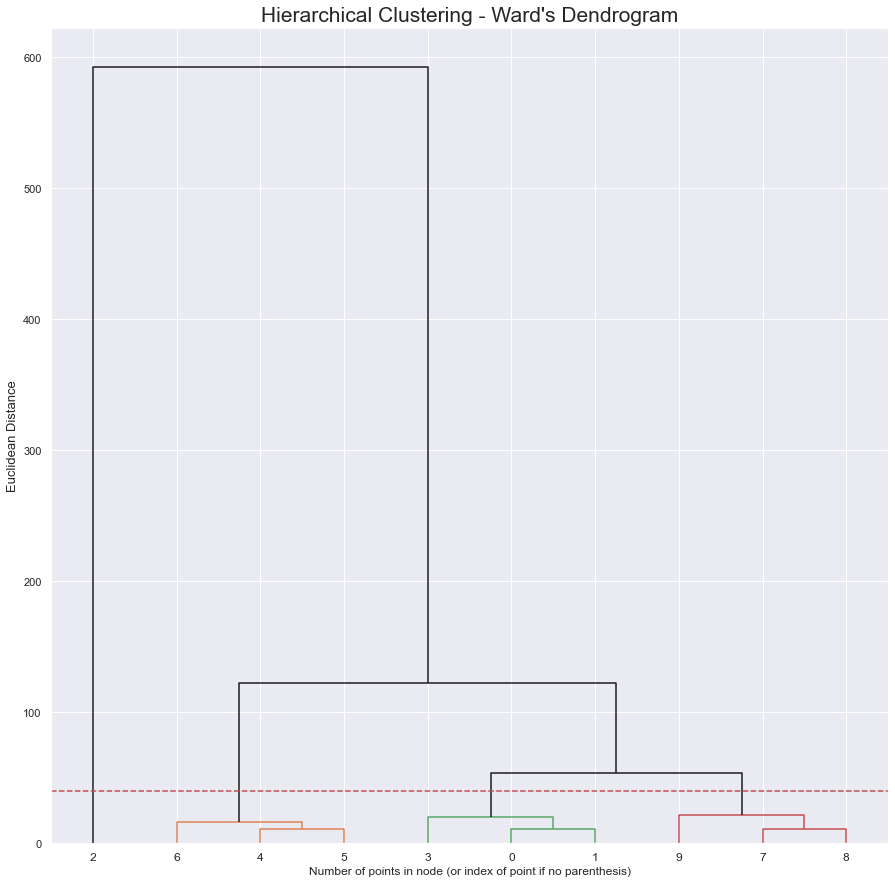

In [173]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(15,15))
# The Dendrogram parameters need to be tuned
y_threshold = 40
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [174]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

NUMCHLD       HIT    POP901  \
neighborhood_up_labels behavior_up_labels                                 
0                      0                   0.036418  0.686729  0.814163   
                       1                   0.033157  0.958608  0.766485   
                       2                   0.000000  0.000000 -0.213826   
                       3                   0.024116  0.966142  0.955332   
1                      0                   0.021164  0.662037  1.185811   
                       1                   0.024626  0.945266  0.811277   
                       3                   0.014052  1.224044  1.016696   
2                      0                   0.025210  0.772247  0.926685   
                       1                   0.028001  0.934104  1.158253   
                       3                   0.017857  0.708333  3.088110   

                                            POP90C1   POP90C2   POP90C3  \
neighborhood_up_labels behavior_up_labels                                 
0                      0                  -0.409499  0.140343  0.471901   
                       1                  -0.446434  0.152959  0.514056   
                       2                   0.000000  0.000000  0.000000   
                       3                  -0.417696  0.137527  0.490801   
1                      0                  -0.037575  0.006921  0.054500   
                       1                  -0.051598  0.008608  0.076014   
                       3                  -0.053486  0.000000  0.095197   
2                      0                  -0.139190  0.042065  0.171046   
                       1                  -0.149450  0.051531  0.172660   
                       3                  -0.131155  0.017203  0.200384   

                                            POP90C4   POP90C5      ETH1  \
neighborhood_up_labels behavior_up_labels                                 
0                      0                  -0.092504  0.092864 -0.625645   
                       1                  -0.140925  0.141169 -0.454067   
                       2                  -0.833333  0.833333 -0.266667   
                       3                  -0.150215  0.150215 -0.371197   
1                      0                  -0.104938  0.104938 -0.603395   
                       1                  -0.069938  0.069938 -0.602705   
                       3                  -0.027322  0.027322 -0.580328   
2                      0                   0.020613 -0.020613 -0.719457   
                       1                  -0.043884  0.044024 -0.725258   
                       3                   0.067708 -0.067708 -0.570833   

                                               ETH2  ...  MINRAMNT  \
neighborhood_up_labels behavior_up_labels            ...             
0                      0                   1.422794  ...  2.186744   
                       1                   1.156157  ...  0.157397   
                       2                   0.583333  ...  3.755000   
                       3                   0.903910  ...  2.928361   
1                      0                   0.373843  ...  2.343218   
                       1                   0.274720  ...  0.346249   
                       3                   0.456284  ...  3.180328   
2                      0                   0.365008  ...  2.263952   
                       1                   0.395584  ...  0.280350   
                       3                   0.505208  ...  2.455670   

                                             MAXRAMNT  LASTGIFT    TIMELAG  \
neighborhood_up_labels behavior_up_labels                                    
0                      0                     0.377105  0.538914  10.327046   
                       1                     0.143507  0.080025   0.112007   
                       2                   420.444444  4.000000  -0.388889   
                       3                    11.904041  7.069910   0.766015   
1                      0        

In [175]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = donors.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['neighborhood_up_labels'], row['behavior_up_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[metric_features]

,NUMCHLD,HIT,POP901,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,AGE,TENURE,INACTIVITY,PROMUSE
merged_labels,,,,,,,,,,,,,,,,,,,,,
0,0.033042,0.929648,0.796973,-0.423814,0.145122,0.488275,-0.129653,0.129899,-0.486820,1.131510,...,0.261665,0.398827,0.282668,0.199006,1.177636,0.214103,-0.182528,0.117467,0.077739,-0.076057
1,0.000000,0.000000,-0.213826,0.000000,0.000000,0.000000,-0.833333,0.833333,-0.266667,0.583333,...,0.250000,3.755000,420.444444,4.000000,-0.388889,116.759746,0.321429,0.333333,-0.600000,0.600000
2,0.024043,0.916576,0.858752,-0.049980,0.008266,0.073802,-0.073348,0.073348,-0.602415,0.289397,...,0.117184,0.628266,0.586313,0.463986,1.370249,0.548499,-0.144754,0.043528,0.058061,-0.055773


In [176]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels

df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['neighborhood_up_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['behavior_up_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])
df_counts.pivot('neighborhood_up_labels', 'behavior_up_labels', 0)

behavior_up_labels,2,3
neighborhood_up_labels,,
0,2.0,NaN
1,NaN,3672.0
2,NaN,86806.0


In [98]:
# Setting df to have the final product, behavior and merged clusters
df = df_.copy()